# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

*While the machines are being fixed.*

Формат сдачи будет объявлен позднее. Либо это будет проверяющая система, либо telegram-бот. 

<span style="color: red; font-size: 14pt">Дедлайны: 
* ФИВТ, третий курс - 4 марта 23:59
* Открытый курс - 7 марта, 23:59
</span>

### Часть 1. Небольшой numpy-разогрев. (10%)

In [374]:
import numpy as np
import pandas as pd

In [375]:
# Создайте случайную матрицу A размерами 10 на 10 из целых чисел от 0 до 100
# hint: np.random.randint
n = 10
k = 100
A = np.ones((n, n))
for i in range(n):
    for j in range(n):
        A[i][j] = int(np.random.randint(100))
A = A.astype(int)
print(A)

[[35 18 86 65 32 84 69 80  4 29]
 [45  6 29 47 39 15 36 38 26 73]
 [51 82 50 53 42 77 99 44 13 34]
 [40 77  3 57 37 39 81 60 32 90]
 [83 96 44 16 66 29 46 99 48 59]
 [ 2 63 61 96  1 85 66 99 91 15]
 [44 95 79 66 33  3 46 88 89 45]
 [87 59 98 91 94 74 36 22 54 85]
 [ 1 55 38 87 87 23 62 53 78 98]
 [80 32 64 97 48 65 11 31  7 66]]


In [376]:
# Посчитайте средние значения в матрице по столбцам

B = np.zeros(n).astype(int)
for i in range(n):
    for j in range(n):
        B[i] += A[j][i]

print(B)

[468 583 552 675 479 494 552 614 442 594]


In [377]:
# Транспонируйте матрицу A

A_T = A.T
print(A_T)

[[35 45 51 40 83  2 44 87  1 80]
 [18  6 82 77 96 63 95 59 55 32]
 [86 29 50  3 44 61 79 98 38 64]
 [65 47 53 57 16 96 66 91 87 97]
 [32 39 42 37 66  1 33 94 87 48]
 [84 15 77 39 29 85  3 74 23 65]
 [69 36 99 81 46 66 46 36 62 11]
 [80 38 44 60 99 99 88 22 53 31]
 [ 4 26 13 32 48 91 89 54 78  7]
 [29 73 34 90 59 15 45 85 98 66]]


In [378]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

print(A @ A.T)

[[33268 17485 30207 24336 27002 33135 27517 34599 26336 27362]
 [17485 15602 17577 19654 20321 17662 19874 25905 22732 19628]
 [30207 17577 35389 30217 31698 32576 30212 36768 29313 26854]
 [24336 19654 30217 32962 31841 29486 30316 33482 32982 24611]
 [27002 20321 31698 31841 41196 31055 37324 38444 32461 26938]
 [33135 17662 32576 29486 31055 46799 38038 35732 34086 26387]
 [27517 19874 30212 30316 37324 38038 42462 38728 35821 26624]
 [34599 25905 36768 33482 38444 35732 38728 55168 40793 40335]
 [26336 22732 29313 32982 32461 34086 35821 40793 42478 27721]
 [27362 19628 26854 24611 26938 26387 26624 40335 27721 32945]]


In [379]:
# Посчитайте dot product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Dot_product

B = A @ A
print(B)

[[24165 33582 29858 34955 21572 28539 30479 31595 23962 26462]
 [19227 20960 20494 24664 17746 18605 18222 20915 13249 21701]
 [24702 32278 30771 35871 21906 25256 30046 35780 26144 29281]
 [26463 27701 29256 36283 24416 22626 23582 30136 22925 32602]
 [31050 29812 35779 38935 31057 29206 29090 33188 23316 35763]
 [22917 35855 29900 42709 28907 27400 34284 32786 31717 37998]
 [28598 32176 30842 39242 32747 26612 32636 30226 23745 40071]
 [32640 41057 35508 44738 30880 36807 41139 44755 26513 39400]
 [30452 36407 28401 38430 31275 23978 29052 33746 26131 40051]
 [23966 28423 25773 33191 20372 29606 30145 31506 16968 27541]]


### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [380]:
all_data = pd.read_csv('forest_dataset.csv')
print(all_data)

         0    1   2    3    4     5    6    7    8     9 ...  45  46  47  48  \
0     2683  333  35   30   26  2743  121  173  179  6572 ...   0   0   0   0   
1     2915   90   8  216   11  4433  232  228  129  4019 ...   0   0   0   0   
2     2941  162   7  698   76  2783  227  242  148  1784 ...   0   0   0   0   
3     3096   60  17  170    3  3303  231  202   99  5370 ...   0   0   0   0   
4     2999   66   8  488   37  1532  228  225  131  2290 ...   0   0   0   0   
5     2878    7  11  417   47  2355  207  218  148  2571 ...   0   0   0   0   
6     2995  144   8  324   77  2523  232  239  138  1711 ...   1   0   0   0   
7     3158  143  28  480   81  1061  247  221   84  2234 ...   0   0   0   0   
8     2911  315   8   67    4  3522  198  233  175  2407 ...   0   0   0   0   
9     2968  212  10   42    3  5413  211  250  173  2213 ...   0   0   0   0   
10    3274  330   9  537  100   616  198  229  170   458 ...   0   0   0   0   
11    3021  147  11   42    0  5196  235

Выделите 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей, в `all_data` поместите оставшиеся 80%.

In [381]:
k_train = 0.8
k_test = 1 - k_train
delayed_data_size = int(k_test * len(all_data))


delayed_data = all_data[:delayed_data_size]
all_data = all_data[delayed_data_size:]
print(f"test_data_size = %s, train_data_size = %s"%(len(delayed_data), len(all_data)))

test_data_size = 1999, train_data_size = 8001


Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [388]:
from sklearn import preprocessing
Scaler = lambda x: preprocessing.scale(x)

labels = all_data[all_data.columns[-1]].values
feature_matrix = Scaler(all_data[all_data.columns[:-1]].values)


private_labels = delayed_data[delayed_data.columns[-1]].values
private_matrix = Scaler(delayed_data[delayed_data.columns[:-1]].values)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [389]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [390]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [391]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(two_class_feature_matrix, two_class_labels, test_size=0.3)
print(len(train_feature_matrix))

4789


Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [392]:
lr_clf = LogisticRegression(solver="newton-cg")

In [393]:
lr_clf.fit(train_feature_matrix, train_labels)
print(accuracy_score(test_labels, lr_clf.predict(test_feature_matrix)))
print(accuracy_score(private_labels, lr_clf.predict(private_matrix)))

0.7778860204578666
0.6688344172086043


#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [394]:
lr_clf = LogisticRegression(solver="saga", multi_class="multinomial", max_iter=3000, tol=0.01)

train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(feature_matrix, labels, test_size=0.2, random_state=42)
lr_clf.fit(train_feature_matrix, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=3000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.01, verbose=0, warm_start=False)

С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [395]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l1', 'l2'], 'C':np.linspace(0.01, 1, 10)}
clf = GridSearchCV(lr_clf, parameters, cv=5, scoring='accuracy')
clf.fit(train_feature_matrix, train_labels)
#print(accuracy_score(test_labels, clf.predict(test_feature_matrix)))


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=3000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.01, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

0.7195502810743285
0.7188594297148574


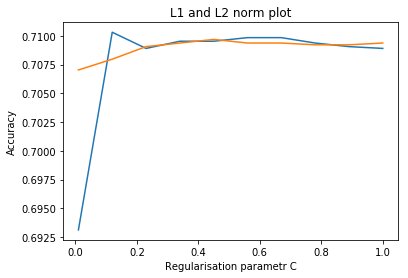

In [396]:
print(accuracy_score(test_labels, clf.predict(test_feature_matrix)))


from matplotlib import pyplot as plt

plt.title("L1 and L2 norm plot")
plt.xlabel("Regularisation parametr C")
plt.ylabel("Accuracy")
plt.plot([elem["C"] for elem in clf.cv_results_["params"][::2]], clf.cv_results_["mean_test_score"][::2])
plt.plot([elem["C"] for elem in clf.cv_results_["params"][1::2]], clf.cv_results_["mean_test_score"][1::2])
plt.show()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

In [398]:
print(f"Optimum value = %s"%(clf.cv_results_["params"][np.argmax(clf.cv_results_["mean_test_score"])]))

Optimum value = {'C': 0.12, 'penalty': 'l1'}


Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [399]:
best_lr_clf = LogisticRegression(C=0.12, penalty="l1")
best_lr_clf.fit(train_feature_matrix, train_labels)
best_lr_clf.predict_proba(test_feature_matrix)
print(accuracy_score(private_labels, best_lr_clf.predict(private_matrix)))



/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7138569284642321


Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [400]:
for i in range(7):
    print(np.average(best_lr_clf.predict_proba(test_feature_matrix).T[i]), end="\t")
    print(len(test_labels[test_labels == i + 1]) / len(test_labels))

0.36665215867814066	0.3791380387257964
0.48344234924099977	0.4772017489069332
0.0608449238583412	0.05434103685196752
0.0056824785878491395	0.006870705808869456
0.018252130918217476	0.012492192379762648
0.03022624192547574	0.03497813866333541
0.03489971679097607	0.03497813866333541


#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [401]:
from sklearn.neighbors import KNeighborsClassifier

k_clf = KNeighborsClassifier()
k_clf.fit(train_feature_matrix, train_labels)

print(accuracy_score(test_labels, k_clf.predict(test_feature_matrix)))
print(accuracy_score(private_labels, k_clf.predict(private_matrix)))

0.7189256714553404
0.7198599299649825


Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

Accuracy for uniform weights = 		 0.7189256714553404
Accuracy for distance weights = 	 0.7364147407870081
7


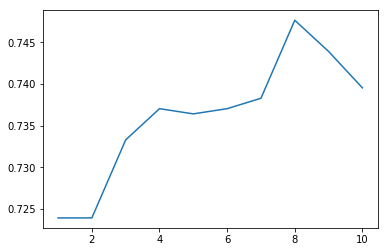

In [408]:
k_clf = KNeighborsClassifier(weights="uniform")
k_clf.fit(train_feature_matrix, train_labels)
print("Accuracy for uniform weights = \t\t %s"%(accuracy_score(test_labels, k_clf.predict(test_feature_matrix))))

k_clf = KNeighborsClassifier(weights="distance")
k_clf.fit(train_feature_matrix, train_labels)
print("Accuracy for distance weights = \t %s"%(accuracy_score(test_labels, k_clf.predict(test_feature_matrix))))


Acc = []
for i in range(1, 11):
    k_clf = KNeighborsClassifier(n_neighbors=i, weights="distance")
    k_clf.fit(train_feature_matrix, train_labels)
    Acc.append(accuracy_score(test_labels, k_clf.predict(test_feature_matrix)))
    
from matplotlib import pyplot as plt
plt.plot([i for i in range(1, 11)], Acc)
print(np.argmax(Acc))
plt.show()

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [410]:
k_clf = KNeighborsClassifier(n_neighbors=8, weights="distance")
k_clf.fit(train_feature_matrix, train_labels)
print(accuracy_score(test_labels, k_clf.predict(test_feature_matrix)))
k_clf.predict_proba(test_feature_matrix)

0.7476577139287945


array([[0.23586105, 0.65329904, 0.        , ..., 0.11083991, 0.        ,
        0.        ],
       [0.        , 0.35084326, 0.        , ..., 0.64915674, 0.        ,
        0.        ],
       [0.4033152 , 0.5966848 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.4416954 , 0.45370519, 0.        , ..., 0.10459941, 0.        ,
        0.        ],
       [0.52189798, 0.47810202, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии и лучшего kNN  на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [413]:
k_clf = KNeighborsClassifier(n_neighbors=8, weights="distance")
k_clf.fit(train_feature_matrix, train_labels)
print(accuracy_score(private_labels, k_clf.predict(private_matrix)))

best_lr_clf = LogisticRegression(C=0.12, penalty="l1")
best_lr_clf.fit(train_feature_matrix, train_labels)
best_lr_clf.predict_proba(test_feature_matrix)
print(accuracy_score(private_labels, best_lr_clf.predict(private_matrix)))




0.7413706853426714


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7138569284642321


# Вывод
У меня получилось что kNN дал на 3% лучше результат, было довольно интересно наблюдать как на результат влияют все теоритические вещи рассказанные на лекции. Сделал домашку на час всего за три дня по два часа, считаю это успех!